In [171]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from itertools import combinations
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from IPython.display import Image
from IPython.display import display

from scipy.stats import bernoulli
from scipy.stats import binom

In [2]:
df = pd.read_csv('/Users/ankitpatel/GADS-AP/Project/all_shots_2.csv')

In [3]:
df.head()

,playerId,GRID_TYPE,GAME_ID,MATCHUP,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,...,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,season,FINAL_MARGIN,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,SHOT_CLOCK,DEF_SUCCESS
0,201167,Shot Chart Detail,21300001,"OCT 29, 2013 - ORL @ IND",6,201167,Arron Afflalo,1610612753,Orlando Magic,1,...,51,266,1,0,201314,-23,201574,2.3,NaN,0.531611
1,201167,Shot Chart Detail,21300001,"OCT 29, 2013 - ORL @ IND",34,201167,Arron Afflalo,1610612753,Orlando Magic,1,...,129,123,1,0,201314,-23,202682,2.5,NaN,0.540646
2,201167,Shot Chart Detail,21300001,"OCT 29, 2013 - ORL @ IND",125,201167,Arron Afflalo,1610612753,Orlando Magic,1,...,192,509,1,0,201314,-23,201171,2.2,21.6,0.540646
3,201167,Shot Chart Detail,21300001,"OCT 29, 2013 - ORL @ IND",173,201167,Arron Afflalo,1610612753,Orlando Magic,2,...,-5,1,1,0,201314,-23,201574,11.1,NaN,0.540646
4,201167,Shot Chart Detail,21300001,"OCT 29, 2013 - ORL @ IND",214,201167,Arron Afflalo,1610612753,Orlando Magic,2,...,28,258,1,0,201314,-23,201171,0.7,NaN,0.540646


In [7]:
df.dropna(inplace = True)
#df['MINUTES_REMAINING'] = df['MINUTES_REMAINING'] * 60
df.SHOT_ZONE_TOTAL = pd.factorize(df.SHOT_ZONE_TOTAL)[0]

In [35]:
#df_success = (df[df.SHOT_MADE_FLAG == 1] & df[df.SHOT_ZONE_TOTAL == zone])
#df_fourth = df[df.PERIOD == 4]
#df_success.describe()

#df.SHOT_ZONE_TOTAL.describe()
df_0 = df[df.SHOT_ZONE_TOTAL == 0]
df_1 = df[df.SHOT_ZONE_TOTAL == 1] 
df_2 = df[df.SHOT_ZONE_TOTAL == 2] 
df_3 = df[df.SHOT_ZONE_TOTAL == 3] 
df_4 = df[df.SHOT_ZONE_TOTAL == 4] 
df_5 = df[df.SHOT_ZONE_TOTAL == 5] 
df_6 = df[df.SHOT_ZONE_TOTAL == 6] 
df_7 = df[df.SHOT_ZONE_TOTAL == 7] 
df_8 = df[df.SHOT_ZONE_TOTAL == 8] 
df_9 = df[df.SHOT_ZONE_TOTAL == 9] 
df_10 = df[df.SHOT_ZONE_TOTAL == 10] 
df_11 = df[df.SHOT_ZONE_TOTAL == 11] 
df_12= df[df.SHOT_ZONE_TOTAL == 12] 
df_13= df[df.SHOT_ZONE_TOTAL == 13] 
df_14= df[df.SHOT_ZONE_TOTAL == 14]
df_15= df[df.SHOT_ZONE_TOTAL == 15] 


In [118]:
#print df_15.LOC_X.mean()
#print df_15.LOC_Y.mean()
X_means = np.array([df_0.LOC_X.mean(),df_1.LOC_X.mean(), df_2.LOC_X.mean(), df_3.LOC_X.mean(), df_4.LOC_X.mean(), df_5.LOC_X.mean(), df_6.LOC_X.mean(), \
           df_7.LOC_X.mean(), df_8.LOC_X.mean(), df_9.LOC_X.mean(), df_10.LOC_X.mean(), df_11.LOC_X.mean(), \
           df_12.LOC_X.mean(), df_13.LOC_X.mean(), df_14.LOC_X.mean(), df_15.LOC_X.mean()])

Y_means = np.array([df_0.LOC_Y.mean(),df_1.LOC_Y.mean(), df_2.LOC_X.mean(), df_3.LOC_Y.mean(), df_4.LOC_Y.mean(), df_5.LOC_Y.mean(), df_6.LOC_Y.mean(), \
           df_7.LOC_Y.mean(), df_8.LOC_Y.mean(), df_9.LOC_Y.mean(), df_10.LOC_Y.mean(), df_11.LOC_Y.mean(), \
           df_12.LOC_Y.mean(), df_13.LOC_Y.mean(), df_14.LOC_Y.mean(), df_15.LOC_Y.mean()])

df_0[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_0[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_1[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_1[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_2[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_2[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_3[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_3[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_4[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_4[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_5[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_5[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_6[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_6[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_7[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_7[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_8[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_8[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_9[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_9[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_10[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_10[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_11[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_11[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_12[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_12[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_13[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_13[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_14[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_14[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
df_15[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = df_15[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)

FGP = np.array([df_0.SHOT_MADE_FLAG.sum() / df_0.SHOT_ATTEMPTED_FLAG.sum(), df_1.SHOT_MADE_FLAG.sum() / df_1.SHOT_ATTEMPTED_FLAG.sum(), \
       df_2.SHOT_MADE_FLAG.sum() / df_2.SHOT_ATTEMPTED_FLAG.sum(), df_3.SHOT_MADE_FLAG.sum() / df_3.SHOT_ATTEMPTED_FLAG.sum(), \
       df_4.SHOT_MADE_FLAG.sum() / df_4.SHOT_ATTEMPTED_FLAG.sum(), df_5.SHOT_MADE_FLAG.sum() / df_5.SHOT_ATTEMPTED_FLAG.sum(), \
       df_6.SHOT_MADE_FLAG.sum() / df_6.SHOT_ATTEMPTED_FLAG.sum(), df_7.SHOT_MADE_FLAG.sum() / df_7.SHOT_ATTEMPTED_FLAG.sum(), \
       df_8.SHOT_MADE_FLAG.sum() / df_8.SHOT_ATTEMPTED_FLAG.sum(), df_9.SHOT_MADE_FLAG.sum() / df_9.SHOT_ATTEMPTED_FLAG.sum(), \
       df_10.SHOT_MADE_FLAG.sum() / df_10.SHOT_ATTEMPTED_FLAG.sum(), df_11.SHOT_MADE_FLAG.sum() / df_11.SHOT_ATTEMPTED_FLAG.sum(), \
       df_12.SHOT_MADE_FLAG.sum() / df_12.SHOT_ATTEMPTED_FLAG.sum(), df_13.SHOT_MADE_FLAG.sum() / df_13.SHOT_ATTEMPTED_FLAG.sum(), \
       df_14.SHOT_MADE_FLAG.sum() / df_14.SHOT_ATTEMPTED_FLAG.sum(), df_15.SHOT_MADE_FLAG.sum() / df_15.SHOT_ATTEMPTED_FLAG.sum()])

attempts = np.array([df_0.SHOT_ATTEMPTED_FLAG.sum(),  df_1.SHOT_ATTEMPTED_FLAG.sum(), df_2.SHOT_ATTEMPTED_FLAG.sum(), \
                    df_3.SHOT_ATTEMPTED_FLAG.sum(), df_4.SHOT_ATTEMPTED_FLAG.sum(),  df_5.SHOT_ATTEMPTED_FLAG.sum(), \
                    df_6.SHOT_ATTEMPTED_FLAG.sum(), df_7.SHOT_ATTEMPTED_FLAG.sum(), df_8.SHOT_ATTEMPTED_FLAG.sum(), \
                    df_9.SHOT_ATTEMPTED_FLAG.sum(), df_10.SHOT_ATTEMPTED_FLAG.sum(), df_11.SHOT_ATTEMPTED_FLAG.sum(), \
                    df_12.SHOT_ATTEMPTED_FLAG.sum(), df_13.SHOT_ATTEMPTED_FLAG.sum(), df_14.SHOT_ATTEMPTED_FLAG.sum(), \
                    df_15.SHOT_ATTEMPTED_FLAG.sum()])

attempts2 = attempts / attempts.max()
       
#print X_means
#print Y_means
#print FGP
#type(X_means[0])
X_means.astype(int)
Y_means.astype(int)
#print float(df_0.SHOT_MADE_FLAG.sum()) / float(df_0.SHOT_ATTEMPTED_FLAG.sum())

array([554,   7, 156,  55,  42,  43, 252, 192,  16, 180, 153,  70, 151,
        19, 406,  71])

In [56]:
#code for creating the NBA court sourced from: http://savvastjortjoglou.com/nba-shot-sharts.html 
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

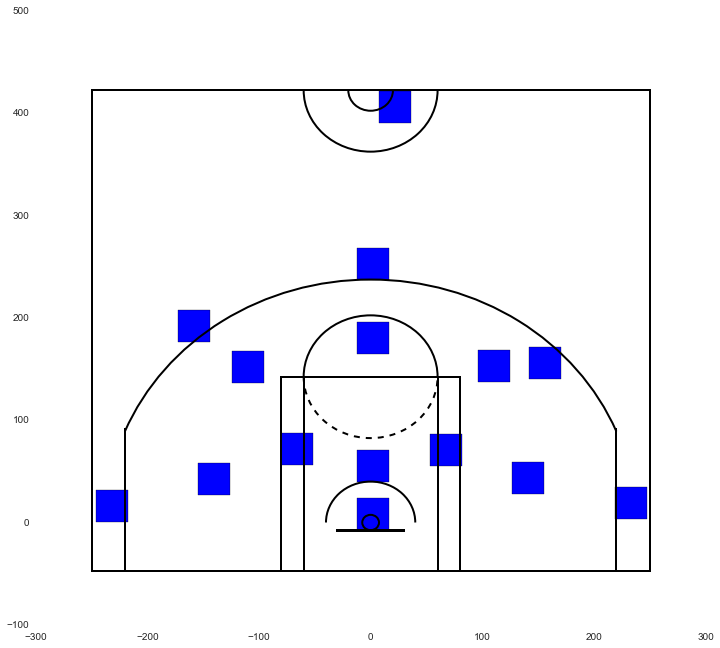

In [149]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.scatter(X_means, Y_means, marker = 's', s = 1000)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()


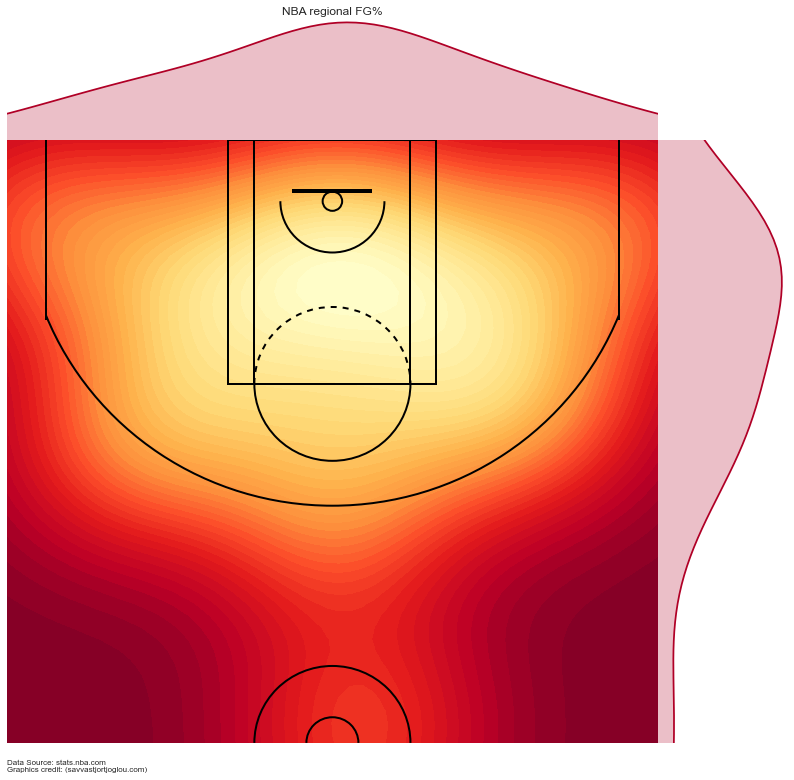

In [83]:
#code sampled from http://savvastjortjoglou.com/nba-shot-sharts.html
# create our jointplot

# get our colormap for the main kde plot
# Note we can extract a color from cmap to use for 
# the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(X_means, Y_means, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels = 50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('NBA regional FG%', 
             y=1.2, fontsize=12)

# Add Data Scource and Author
ax.text(-250,445,'Data Source: stats.nba.com'
        '\nGraphics credit: (savvastjortjoglou.com)',
        fontsize=8)

# Add Harden's image to the top right
# First create our OffSetImage by passing in our image
# and set the zoom level to make the image small enough 
# to fit on our plot
#img = OffsetImage(harden_pic, zoom=0.6)
# Pass in a tuple of x,y coordinates to set_offset
# to place the plot where you want, I just played around
# with the values until I found a spot where I wanted
# the image to be
#img.set_offset((625,621))
# add the image
#ax.add_artist(img)

plt.show()

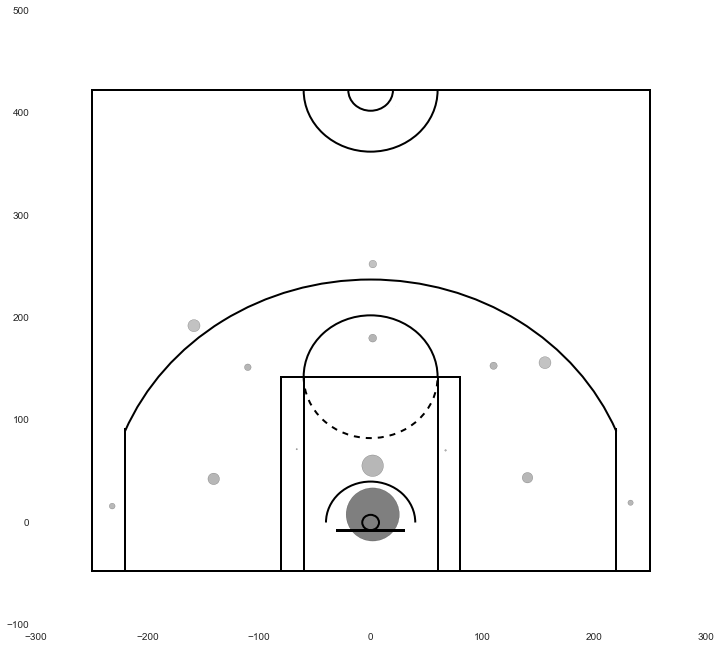

[ 0.03059976  0.60481735  0.34492639  0.39221079  0.39450668  0.39534694
  0.34699299  0.34933957  0.3868267   0.4020139   0.39206892  0.39915187
  0.39698069  0.38881675  0.05309735  0.40030488]


In [158]:
plt.figure(figsize=(12,11))
#cmap=plt.cm.YlOrRd_r 
cmap=plt.cm.flag

draw_court(outer_lines=True)
colors =  FGP
#.astype(int)
area = np.pi * (30 * attempts2)**2 # 0 to 30 point radiuses
plt.scatter(X_means, Y_means, s=area, c=colors, alpha=0.5)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()
print FGP

In [159]:
#df_success = (df[df.SHOT_MADE_FLAG == 1] & df[df.SHOT_ZONE_TOTAL == zone])
#df_success.describe()


dfL = df[df.PLAYER_NAME == 'LeBron James']


dfL_0 = dfL[dfL.SHOT_ZONE_TOTAL == 0]
dfL_1 = dfL[dfL.SHOT_ZONE_TOTAL == 1] 
dfL_2 = dfL[dfL.SHOT_ZONE_TOTAL == 2] 
dfL_3 = dfL[dfL.SHOT_ZONE_TOTAL == 3] 
dfL_4 = dfL[dfL.SHOT_ZONE_TOTAL == 4] 
dfL_5 = dfL[dfL.SHOT_ZONE_TOTAL == 5] 
dfL_6 = dfL[dfL.SHOT_ZONE_TOTAL == 6] 
dfL_7 = dfL[dfL.SHOT_ZONE_TOTAL == 7] 
dfL_8 = dfL[dfL.SHOT_ZONE_TOTAL == 8] 
dfL_9 = dfL[dfL.SHOT_ZONE_TOTAL == 9] 
dfL_10 = dfL[dfL.SHOT_ZONE_TOTAL == 10] 
dfL_11 = dfL[dfL.SHOT_ZONE_TOTAL == 11] 
dfL_12= dfL[dfL.SHOT_ZONE_TOTAL == 12] 
dfL_13= dfL[dfL.SHOT_ZONE_TOTAL == 13] 
dfL_14= dfL[dfL.SHOT_ZONE_TOTAL == 14]
dfL_15= dfL[dfL.SHOT_ZONE_TOTAL == 15] 

In [164]:
#print df_15.LOC_X.mean()
#print df_15.LOC_Y.mean()
XL_means = np.array([dfL_0.LOC_X.mean(),dfL_1.LOC_X.mean(), dfL_2.LOC_X.mean(), dfL_3.LOC_X.mean(), dfL_4.LOC_X.mean(), dfL_5.LOC_X.mean(), dfL_6.LOC_X.mean(), \
           dfL_7.LOC_X.mean(), dfL_8.LOC_X.mean(), dfL_9.LOC_X.mean(), dfL_10.LOC_X.mean(), dfL_11.LOC_X.mean(), \
           dfL_12.LOC_X.mean(), dfL_13.LOC_X.mean(), dfL_14.LOC_X.mean(), dfL_15.LOC_X.mean()])

YL_means = np.array([dfL_0.LOC_Y.mean(),dfL_1.LOC_Y.mean(), dfL_2.LOC_X.mean(), dfL_3.LOC_Y.mean(), dfL_4.LOC_Y.mean(), dfL_5.LOC_Y.mean(), dfL_6.LOC_Y.mean(), \
           dfL_7.LOC_Y.mean(), dfL_8.LOC_Y.mean(), dfL_9.LOC_Y.mean(), dfL_10.LOC_Y.mean(), dfL_11.LOC_Y.mean(), \
           dfL_12.LOC_Y.mean(), dfL_13.LOC_Y.mean(), dfL_14.LOC_Y.mean(), dfL_15.LOC_Y.mean()])

dfL_0[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_0[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_1[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_1[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_2[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_2[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_3[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_3[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_4[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_4[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_5[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_5[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_6[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_6[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_7[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_7[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_8[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_8[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_9[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_9[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_10[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_10[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_11[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_11[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_12[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_12[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_13[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_13[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_14[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_14[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)
dfL_15[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']] = dfL_15[['SHOT_MADE_FLAG', 'SHOT_ATTEMPTED_FLAG']].astype(float)

attemptsL = np.array([0, dfL_1.SHOT_ATTEMPTED_FLAG.sum(), dfL_2.SHOT_ATTEMPTED_FLAG.sum(), \
                    dfL_3.SHOT_ATTEMPTED_FLAG.sum(), dfL_4.SHOT_ATTEMPTED_FLAG.sum(),  dfL_5.SHOT_ATTEMPTED_FLAG.sum(), \
                    dfL_6.SHOT_ATTEMPTED_FLAG.sum(), dfL_7.SHOT_ATTEMPTED_FLAG.sum(), dfL_8.SHOT_ATTEMPTED_FLAG.sum(), \
                    dfL_9.SHOT_ATTEMPTED_FLAG.sum(), dfL_10.SHOT_ATTEMPTED_FLAG.sum(), dfL_11.SHOT_ATTEMPTED_FLAG.sum(), \
                    dfL_12.SHOT_ATTEMPTED_FLAG.sum(), dfL_13.SHOT_ATTEMPTED_FLAG.sum(), dfL_14.SHOT_ATTEMPTED_FLAG.sum(), \
                    dfL_15.SHOT_ATTEMPTED_FLAG.sum()])

FGPL = np.array([0, dfL_1.SHOT_MADE_FLAG.sum() / dfL_1.SHOT_ATTEMPTED_FLAG.sum(), \
       dfL_2.SHOT_MADE_FLAG.sum() / dfL_2.SHOT_ATTEMPTED_FLAG.sum(), dfL_3.SHOT_MADE_FLAG.sum() / dfL_3.SHOT_ATTEMPTED_FLAG.sum(), \
       dfL_4.SHOT_MADE_FLAG.sum() / dfL_4.SHOT_ATTEMPTED_FLAG.sum(), dfL_5.SHOT_MADE_FLAG.sum() / dfL_5.SHOT_ATTEMPTED_FLAG.sum(), \
       dfL_6.SHOT_MADE_FLAG.sum() / dfL_6.SHOT_ATTEMPTED_FLAG.sum(), dfL_7.SHOT_MADE_FLAG.sum() / dfL_7.SHOT_ATTEMPTED_FLAG.sum(), \
       dfL_8.SHOT_MADE_FLAG.sum() / dfL_8.SHOT_ATTEMPTED_FLAG.sum(), dfL_9.SHOT_MADE_FLAG.sum() / dfL_9.SHOT_ATTEMPTED_FLAG.sum(), \
       dfL_10.SHOT_MADE_FLAG.sum() / dfL_10.SHOT_ATTEMPTED_FLAG.sum(), dfL_11.SHOT_MADE_FLAG.sum() / dfL_11.SHOT_ATTEMPTED_FLAG.sum(), \
       dfL_12.SHOT_MADE_FLAG.sum() / dfL_12.SHOT_ATTEMPTED_FLAG.sum(), dfL_13.SHOT_MADE_FLAG.sum() / dfL_13.SHOT_ATTEMPTED_FLAG.sum(), \
       dfL_14.SHOT_MADE_FLAG.sum() / dfL_14.SHOT_ATTEMPTED_FLAG.sum(), dfL_15.SHOT_MADE_FLAG.sum() / dfL_15.SHOT_ATTEMPTED_FLAG.sum()])


attempts2L = attemptsL / attemptsL.max()
       
#print X_means
#print Y_means
#print FGP
#type(X_means[0])
XL_means.astype(int)
YL_means.astype(int)





array([-9223372036854775808,                    6,                  153,
                         54,                   43,                   52,
                        259,                  198,                   16,
                        190,                  151,                   71,
                        151,                   21,                  406,
                         66])

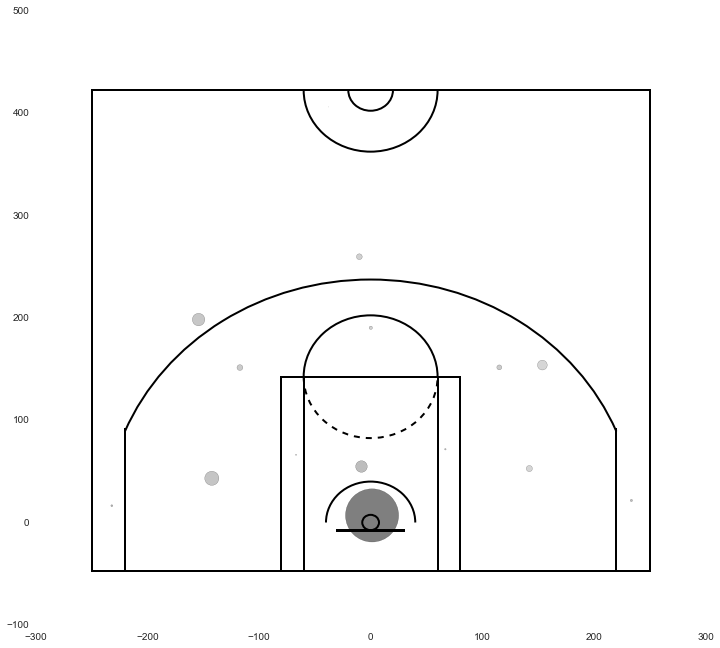

[ 0.          0.74598394  0.31693989  0.44239631  0.39772727  0.31304348
  0.34259259  0.38888889  0.48571429  0.33870968  0.36956522  0.39285714
  0.36697248  0.42857143  0.          0.52631579]


In [165]:
plt.figure(figsize=(12,11))
#cmap=plt.cm.YlOrRd_r 


draw_court(outer_lines=True)
colors =  FGPL
#.astype(int)
area = np.pi * (30 * attempts2L)**2 # 0 to 30 point radiuses
plt.scatter(XL_means, YL_means, s=area, c=colors, alpha=0.5)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()
print FGPL

In [178]:
#Take the baseline FG numbers for LBJ and try to see if changing the conditional variables makes a difference
mu= float(dfL.SHOT_MADE_FLAG.sum()) / float(dfL.SHOT_ATTEMPTED_FLAG.sum())
N= dfL.SHOT_ATTEMPTED_FLAG.sum()
n = dfL.SHOT_MADE_FLAG.sum()
print "LBJ's mean shot's made is {:5.2f}".format(float(binom.stats(n, mu, moments='m')))
print "The variance is {:5.2f}".format(float(binom.stats(n, mu, moments='v')))

D = binom.rvs(n, mu, size=N)
print D

LBJ's mean shot's made is 691.58
The variance is 328.42
[709 688 670 ..., 708 670 698]


254    8.0
255    4.1
256    3.6
257    3.7
258    3.4
259    3.9
260    4.5
261    4.8
262    8.3
263    5.6
264    3.7
692    4.0
693    5.7
694    5.6
695    5.0
...
396664     1.8
396665     5.6
396666     1.5
396667     4.9
396668    23.7
396669     2.4
396670     2.5
396671     7.9
396672     2.4
396673     3.9
396674     6.1
396675     5.0
396676     7.4
396677     1.4
396678     5.6
Name: CLOSE_DEF_DIST, Length: 2508, dtype: float64


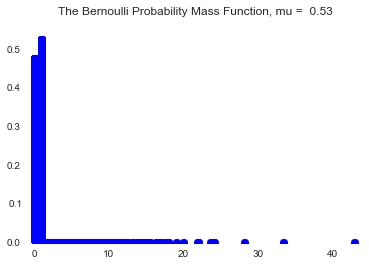

In [170]:
x= dfL.CLOSE_DEF_DIST
mu = float(dfL.SHOT_MADE_FLAG.sum()) / float(dfL.SHOT_ATTEMPTED_FLAG.sum())
fig, ax = plt.subplots(1, 1)
ax.plot(x, bernoulli.pmf(x, mu), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, mu), colors='b', lw=8, alpha=1.0)
ax.set_title("The Bernoulli Probability Mass Function, mu = {:5.2f}".format(mu))
ax.set_xlim(min(x)-1, max(x)+1)
ax.set_ylim(0, mu+0.1*mu)


In [20]:
df_scaled = df.reindex(columns = ['SHOT_ZONE_TOTAL','SHOT_CLOCK', 'CLOSE_DEF_DIST', 'SHOT_DISTANCE', 'DEF_SUCCESS', \
                                 'SHOT_MADE_FLAG'])
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)

In [21]:
df_scaled.describe()

,SHOT_ZONE_TOTAL,SHOT_CLOCK,CLOSE_DEF_DIST,SHOT_DISTANCE,DEF_SUCCESS,SHOT_MADE_FLAG
count,3.836470e+05,3.836470e+05,3.836470e+05,3.836470e+05,3.836470e+05,3.836470e+05
mean,5.326566e-17,-4.341262e-16,-4.960411e-16,2.322501e-17,1.918713e-13,1.067536e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.212677e+00,-2.165253e+00,-1.519950e+00,-1.246777e+00,-5.748935e+01,-9.084554e-01
25%,-9.458127e-01,-7.403168e-01,-6.785985e-01,-1.044267e+00,-2.906496e-02,-9.084554e-01
50%,-4.120835e-01,-2.784856e-02,-1.664713e-01,6.953608e-02,-2.906496e-02,-9.084554e-01
75%,6.553750e-01,7.193742e-01,4.188169e-01,9.808296e-01,-2.906496e-02,1.100770e+00
max,2.790292e+00,2.005293e+00,1.881882e+01,7.461139e+00,8.550113e+01,1.100770e+00


In [26]:
predictors = ['SHOT_ZONE_TOTAL','SHOT_CLOCK', 'CLOSE_DEF_DIST', 'SHOT_DISTANCE', 'DEF_SUCCESS']
df_scaled[predictors].corrwith(df_scaled.SHOT_MADE_FLAG).sort(ascending = False, inplace = False)

CLOSE_DEF_DIST     0.000706
SHOT_CLOCK         0.000392
DEF_SUCCESS       -0.004012
SHOT_ZONE_TOTAL   -0.128497
SHOT_DISTANCE     -0.195052
dtype: float64

In [9]:
#Introduce a new parameter 'max_num_features_to_try', so as to limit the number of features this function will
#use as an argument into combinations

def brute_force(data, target_variable, predictors, model, alpha_list = [1.0], degree_list = [3],
                max_num_features_to_try = 3):
    ''' brute_force is a simple function designed to:
    test every combination of predictors submitted in the predictors argument
    test all degrees of polynomial as submitted in the degree_list argument
    test a number of regularization parameters as submitted in the alpha_list argument
    
    model is the algorithm to be tested
     '''
    min_mse = 1e99
    test_size_split = 0.5

    #search over every combination of the predictors - using the itertools functionality
    for i in xrange(1, max_num_features_to_try + 1):
        #it's not a bad idea to put an indicator of progress into the code
        print '.',
        
        #build and test a model for each combination of predictors
        for j in combinations(predictors, i):
            
            test_predictors = list(j)
            
            #use train test split to get the training and test datasets, according to the parameter test_size_split
            X_train, X_test, y_train, y_test = train_test_split(data[test_predictors], \
                                                    data[target_variable], test_size=test_size_split, random_state=42)
            
            #Now search over all the polynomial degrees in the degree_list
            for degree in degree_list:
                
                #Make sure each model is regularized, and search over all alphas in the regularization list
                for a in alpha_list:
                    
                    #build the model - all parameteres being determined using the training data
                    clf = make_pipeline(PolynomialFeatures(degree), model(alpha = a))
                    dummy = PolynomialFeatures(degree).fit_transform(X_train)
                    
                    #fit the model
                    clf.fit(X_train, y_train)
                    
                    #Get the test set predictions
                    y_hat = clf.predict(X_test)
                    
                    #measure the mean squared error of the test set
                    mse = mean_squared_error(y_hat, y_test)
                    
                    #remember ALL information for the minimum
                    if mse < min_mse:
                        min_mse = mse
                        min_clf = clf
                        min_predictors = test_predictors
                        min_degree = degree
                        min_alpha = a
                        #unless you cannot afford to do this, it is always a good idea to remember the train, test
                        #datasets actually used to build your model
                        min_X_train = X_train
                        min_y_train = y_train
                        min_X_test = X_test
                        min_y_test = y_test
                        input_dimension = dummy.shape[1]
                    
    #return a tuple for the minimum model and parameters
    return (min_mse, min_clf, min_predictors, min_degree, min_alpha, 
            min_X_train, min_y_train, min_X_test, min_y_test, input_dimension)

def print_essential_results(results):
    print "MSE = {:5.7f}".format(results[0])
    print "Best predictors = ", results[2]
    print "Input dimension = ", results[9]
    print "Optimal degree polynomial = ", results[3]
    print "Optimal regularization value = ", results[4]

def get_degree_v_mse(results, model, degree_list=[3], ylog=1.0, ylim_low = 0.0, ylim_high=1.0):
    '''get_degree_v_mse uses the results list to produce a plot of degree vs mse for the training
    and test sets'''
    
    #use the regularization parameter you found in the brute force routine
    model_alpha = results[4]

    #set up the lists to accumulate the MSE's
    training_error = []
    testing_error = []
    
    #Search through each degree in the supplied degree_list
    for degree in degree_list:
        
        #Build the model
        clf = make_pipeline(PolynomialFeatures(degree), model())
        
        #Fit the model using the training data from the brute force routine
        clf.fit(results[5], results[6])
        
        #Accumulate the mse results for the training and test sets
        training_error.append(mean_squared_error(results[6], clf.predict(results[5])))
        testing_error.append(mean_squared_error(results[8], clf.predict(results[7])))
    
    #Plot the results
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    ax.plot(np.array(degree_list), np.array(training_error), color = 'green', marker = 'o', label='Training Error')
    ax.plot(np.array(degree_list), np.array(testing_error), color = 'red', marker = 'o', label='Validation Error')
    ax.set_title("Plot of MSE vs Poylnomial Degree")
    if ylog:
        ax.set_yscale('Log')
        ax.set_ylabel('Log(MSE)')
    else:
        ax.set_ylabel('MSE')

    ax.set_ylim(ylim_low, ylim_high)
    ax.set_xlabel('Degree')
    ax.legend(loc='best')
    
def get_alpha_v_mse(results, model, alpha_list=[0.1], ylog=1.0, ylim_low = 0.0,ylim_high=1.0):
    '''get_alpha_v_mse uses the results list to produce a plot of regularization vs mse for the training
    and test sets'''
    
    #use the polynomial degree you found in the brute force routine
    max_degree = results[3]

    #set up the lists to accumulate the MSE's
    training_error = []
    testing_error = []
    
    #Search through each regularization parameter in the supplied alpha_list
    for a in alpha_list:
        
        #build the model
        clf = make_pipeline(PolynomialFeatures(max_degree), model(alpha=a))
        
        #fit the model using the training set used in the brute force routine
        clf.fit(results[5], results[6])
        
        #accumulate the mse for the training and test sets
        training_error.append(mean_squared_error(results[6], clf.predict(results[5])))
        testing_error.append(mean_squared_error(results[8], clf.predict(results[7])))
    
    
    #plot the results
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    ax.plot(np.array(alpha_list), np.array(training_error), color = 'green', marker = 'o', label='Training Error')
    ax.plot(np.array(alpha_list), np.array(testing_error), color = 'red', marker = 'o', label='Validation Error')
    ax.set_title("PLot of Regularization vs Poylnomial Degree")
    if ylog:
        ax.set_yscale('Log')
        ax.set_ylabel('Log(MSE)')
    else:
        ax.set_ylabel('MSE')

    ax.set_ylim(ylim_low, ylim_high)
    ax.set_xscale('Log')
    ax.set_xlabel('Log Alpha')
    ax.legend(loc='best')
    
def plot_results(results):
    '''plots out the the y_test predictions (y_hat) vs the actual, known results'''
    
    mpl.style.use('ggplot')
    half_points = len(results[8])/2

    fig = plt.figure(figsize=(30, 15))
    ax = plt.subplot(311)
    ax.plot(results[8][:half_points], color = 'blue', marker='o')
    ax.plot(results[1].predict(results[7])[:half_points], color="red", marker='o')
    
    ax = plt.subplot(312)
    ax.plot(results[8][half_points:], color = 'blue', marker='o')
    ax.plot(results[1].predict(results[7])[half_points:], color="red", marker='o')
    
    max_points_to_display = 100
    yy = np.ones(len(results[8]))
    thigh = results[1].predict(results[7]) + (yy * np.sqrt(results[0]))
    tlow = results[1].predict(results[7]) - (yy * np.sqrt(results[0]))
    x_plot = np.arange(0, len(results[8]))

    ax = plt.subplot(313)
    ax.plot(results[8][:max_points_to_display], color = 'blue', marker='.')
    ax.plot(results[1].predict(results[7])[:max_points_to_display], color="red", marker='.', alpha=0.35)
    ax.fill_between(x_plot[:max_points_to_display], thigh[:max_points_to_display],\
                tlow[:max_points_to_display], color='k', alpha=.25)

In [11]:
ridge_results = brute_force(df, 
                        'SHOT_MADE_FLAG', 
                        predictors, 
                        Ridge, 
                        alpha_list=np.logspace(-10, 4, 10), 
                        degree_list = [2, 3, 4],
                        max_num_features_to_try = 5)

. . . . .


In [12]:
print_essential_results(ridge_results)

MSE = 0.2313978
Best predictors =  ['SHOT_ZONE_TOTAL', 'SHOT_DISTANCE']
Input dimension =  15
Optimal degree polynomial =  4
Optimal regularization value =  1e-10


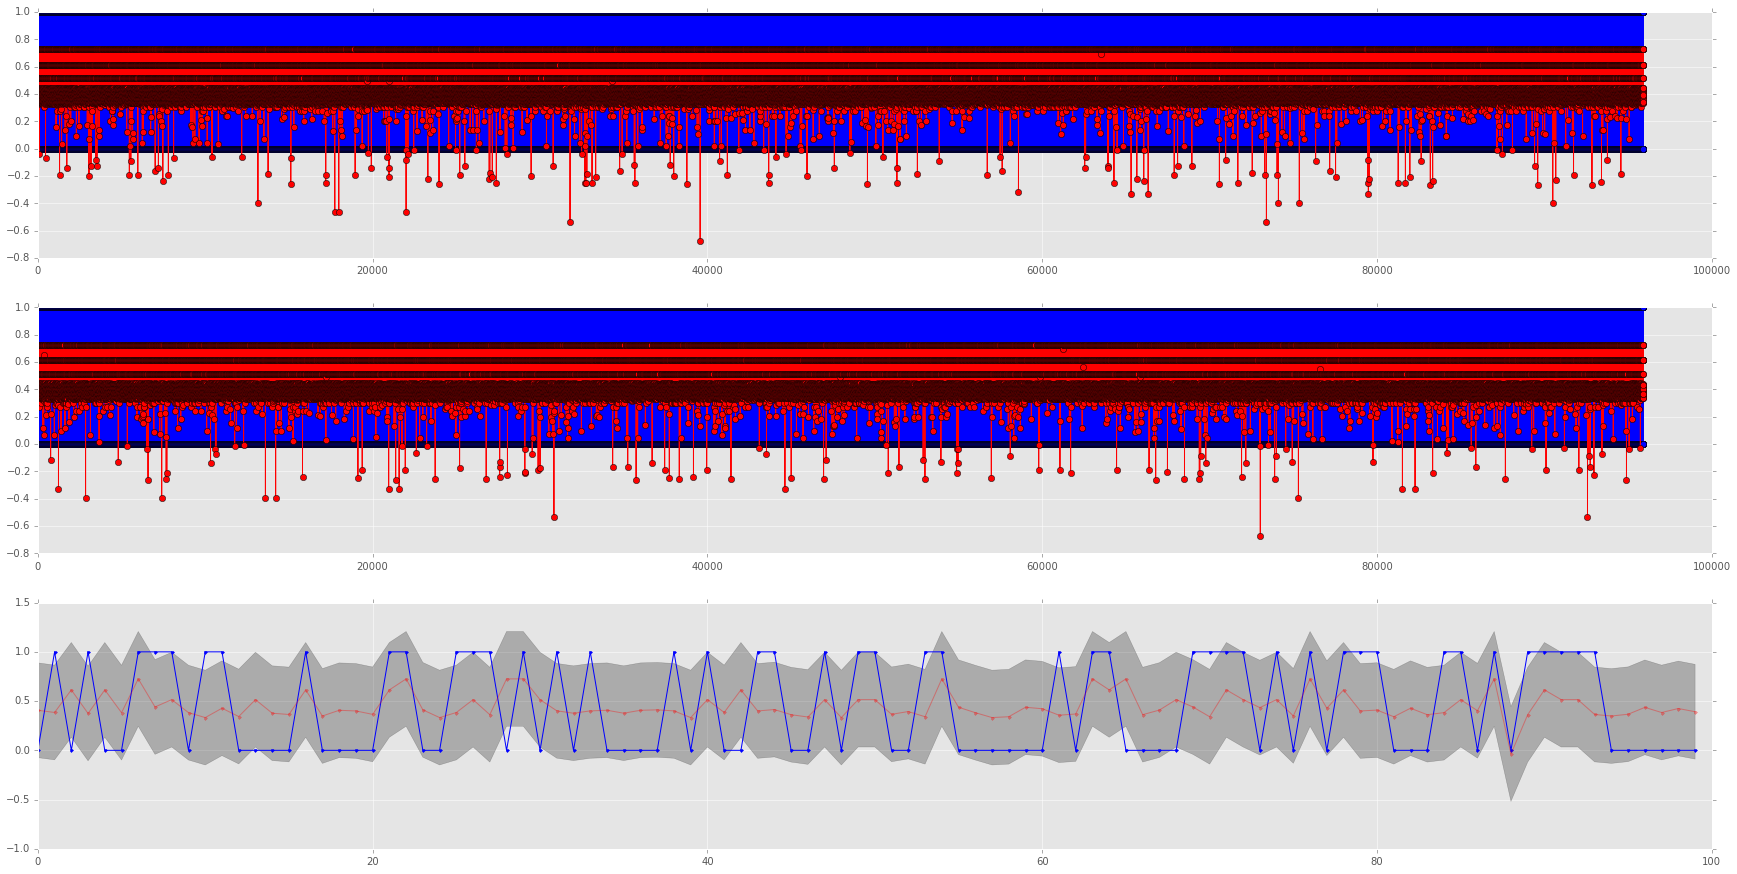

In [13]:
plot_results(ridge_results)

In [14]:
pd.DataFrame({'actual' : ridge_results[8], 'predicted' : ridge_results[1].predict(ridge_results[7])}).corr()

,actual,predicted
actual,1.000000,0.256558
predicted,0.256558,1.000000


In [15]:
lasso_results = brute_force(df, 
                        'SHOT_MADE_FLAG', 
                        predictors, 
                        Lasso, 
                        alpha_list=np.logspace(-10, 4, 10), 
                        degree_list = [2, 3, 4, 5, 6],
                        max_num_features_to_try = 5)

. . . . .


/Users/ankitpatel/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:490: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [16]:
print_essential_results(lasso_results)

MSE = 0.2320355
Best predictors =  ['SHOT_ZONE_TOTAL', 'SHOT_CLOCK', 'SHOT_DISTANCE', 'DEF_SUCCESS']
Input dimension =  210
Optimal degree polynomial =  6
Optimal regularization value =  4.64158883361e-06


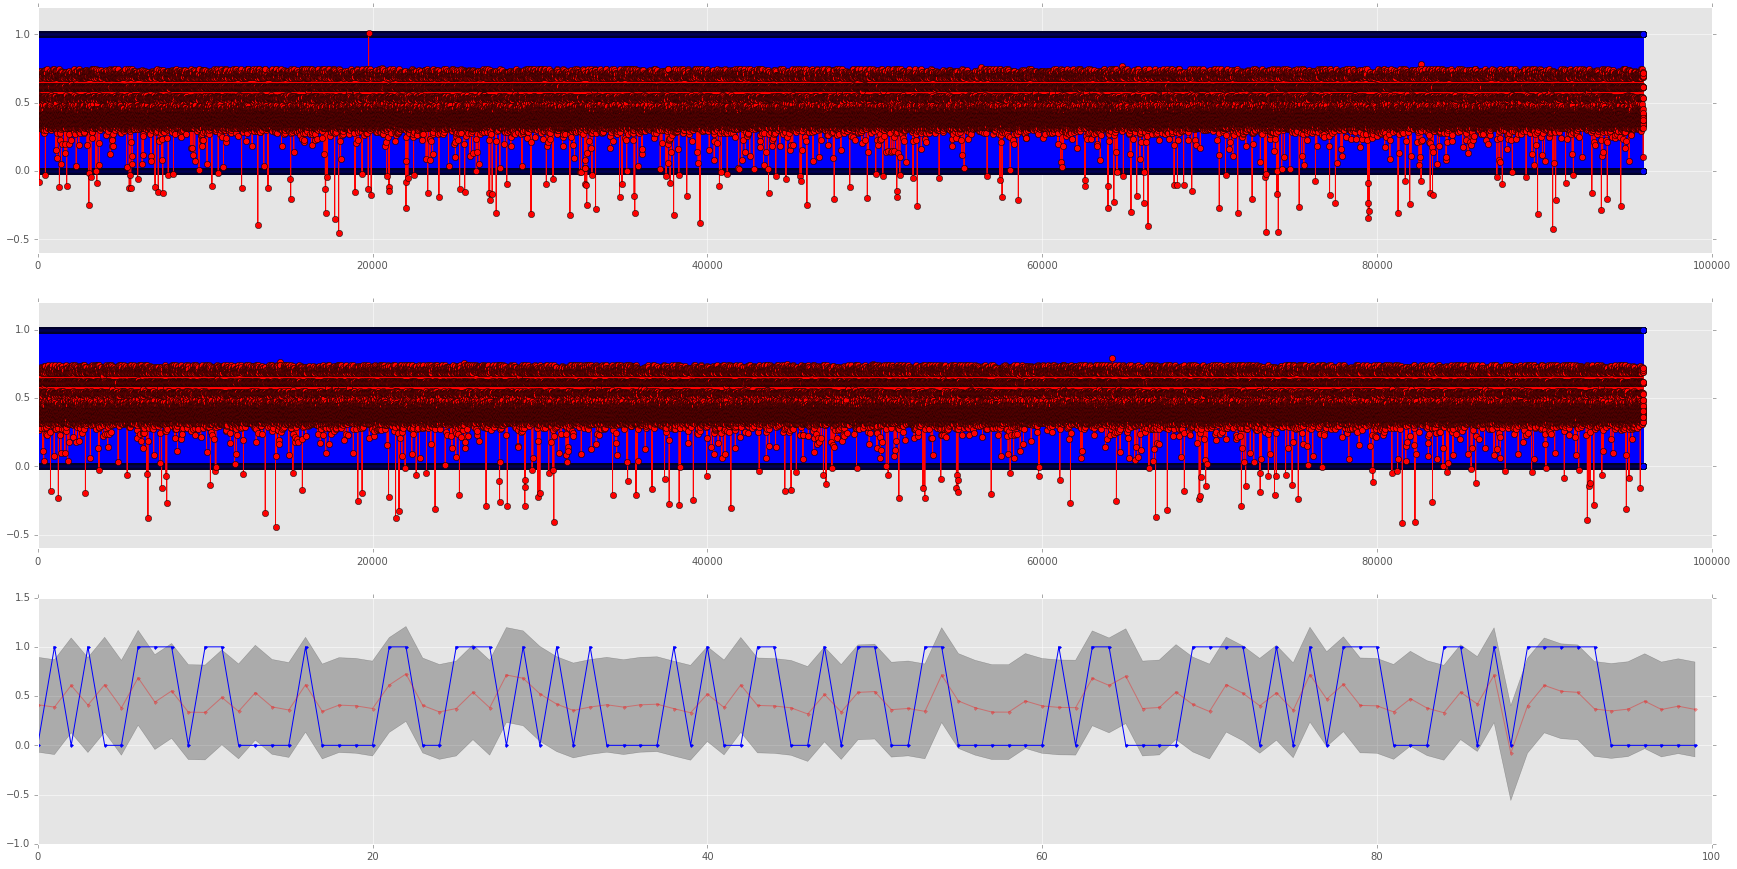

In [17]:
plot_results(lasso_results)

In [18]:
pd.DataFrame({'actual' : lasso_results[8], 'predicted' : lasso_results[1].predict(lasso_results[7])}).corr()

,actual,predicted
actual,1.000000,0.251511
predicted,0.251511,1.000000


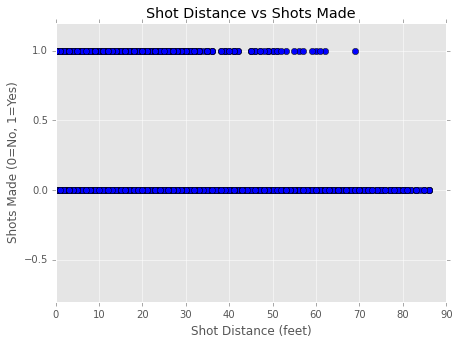

In [28]:
fig = plt.figure(figsize = (7,5))
ax = plt.subplot(111)
ax.set_ylim(-0.8, 1.2)
ax.plot(df.SHOT_DISTANCE, df.SHOT_MADE_FLAG, 'bo')
ax.set_title("Shot Distance vs Shots Made")
ax.set_xlabel("Shot Distance (feet)")
ax.set_ylabel("Shots Made (0=No, 1=Yes)")

In [33]:
x_plot = np.linspace(20, 90, 10).reshape(10, 1)

clfLR = LogisticRegression(C=1000)
clfLR.fit(df[['SHOT_DISTANCE']], df['SHOT_MADE_FLAG'])

probabilities = clfLR.predict_proba(x_plot)[:,1].ravel()
print "Here are the proabilities: ", probabilities

predictions = clfLR.predict(x_plot)
print "Here are the class predictions: ", predictions

Here are the proabilities:  [ 0.37375476  0.302576    0.23976289  0.18650241  0.14285002  0.10805766
  0.0809391   0.06016722  0.04446823  0.03272283]
Here are the class predictions:  [0 0 0 0 0 0 0 0 0 0]


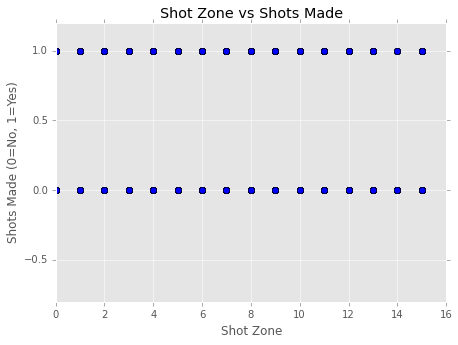

In [29]:
fig = plt.figure(figsize = (7,5))
ax = plt.subplot(111)
ax.set_ylim(-0.8, 1.2)
ax.plot(df.SHOT_ZONE_TOTAL, df.SHOT_MADE_FLAG, 'bo')
ax.set_title("Shot Zone vs Shots Made")
ax.set_xlabel("Shot Zone")
ax.set_ylabel("Shots Made (0=No, 1=Yes)")